In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

# from chiral import CHIRAL
# from helper_fn import optimal_shift

from pyCHIRAL import CHIRAL, optimal_shift, circular_deviation

In [2]:
path = "/Users/salati/Documents/CODE/github/scCircadianMeta/data/DROSOPHILA/drosophila.h5ad"
adata = sc.read_h5ad(path)

In [3]:
CT = "2_s_LNv"
adata.obs.celltype.unique()

['6_DN1p', '19_DN2', '15_DN1p_CNMa', '3_DN1a', '2_s_LNv', ..., '8_LN_ITP', '12_LNd', '4_DN1p', '14_DN3', '25_l_LNv']
Length: 17
Categories (17, object): ['1_DN1p_CNMa', '2_s_LNv', '3_DN1a', '4_DN1p', ..., '19_DN2', '20_DN3', '25_l_LNv', '29_LPN']

In [4]:
adata2 = adata[adata.obs.celltype == CT]
adata2.layers["s_log"] = adata2.layers["s_log"].toarray()

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_2373/689406045.py:2: ImplicitModificationWarning: Setting element `.layers['s_log']` of view, initializing view as actual.
  adata2.layers["s_log"] = adata2.layers["s_log"].toarray()


In [5]:
gene_list = np.array(
    [
        "tim",
        "CG31705",
        "CG14082",
        "CG31324",
        "Scp2",
        "Argk",
        "Clk",
        "nrv1",
        "Nmdmc",
        "GABA-B-R3",
        "dpr15",
        "mtt",
        "sNPF",
        "bnb",
    ]
)

In [13]:
res = CHIRAL(E=adata2, clockgenes=gene_list ,layer="s_log", iterations=500)

  0%/Users/salati/Documents/CODE/github/pyCHIRAL/pyCHIRAL/em.py:228: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Q_hist = pd.concat([Q_hist, Q_temp])  # Append the new iteration results
  1%

Algorithm has converged


Text(0, 0.5, 'CHIRAL phase')

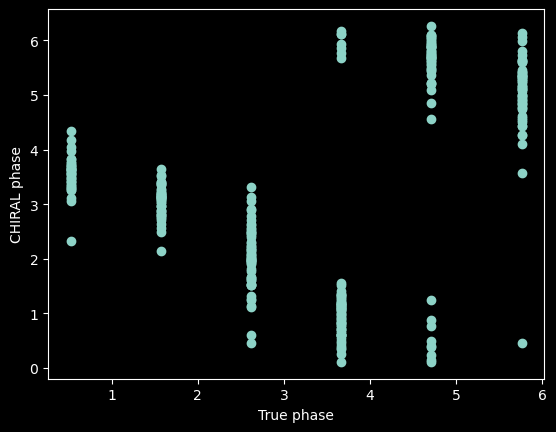

In [14]:
w =  2 * np.pi / 24
true_phase = (adata2.obs.ZTmod.values % 24) * w
phi = res["phi"]

plt.scatter(true_phase, phi)
plt.xlabel("True phase")
plt.ylabel("CHIRAL phase")

1.2389200492401602


Text(0, 0.5, 'Aligned phase')

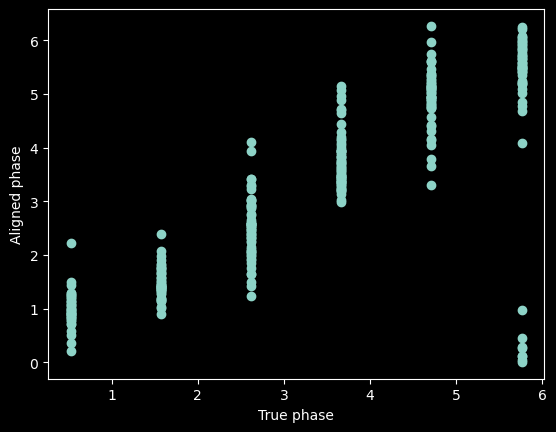

In [15]:
phase_aligned, mad = optimal_shift(phi, true_phase)
print(mad)

plt.scatter(true_phase, phase_aligned)
plt.xlabel("True phase")
plt.ylabel("Aligned phase")

# stupid case

(5, 2)


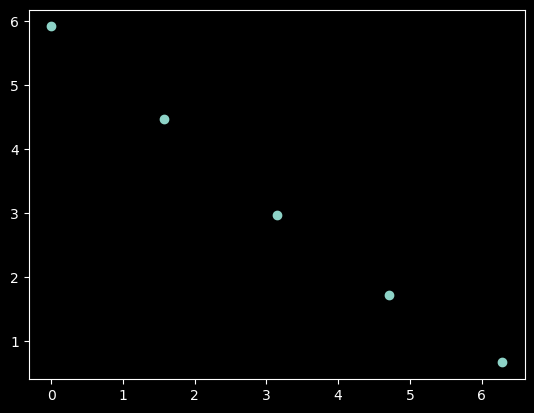

In [16]:
p0 = np.linspace(0, 2 * np.pi, 5) 
p1 = (np.linspace(0, 2 * np.pi, 5) * -1 + np.random.normal(0, 0.5, 5)) % (2 * np.pi) 
p2 = (np.linspace(0, 2 * np.pi, 5)) + np.random.normal(0, 0.5, 5)

phi_cs = np.concatenate([p1[:, None], p2[:, None]], axis=1)
print(phi_cs.shape
      )

plt.scatter(p0, p1)

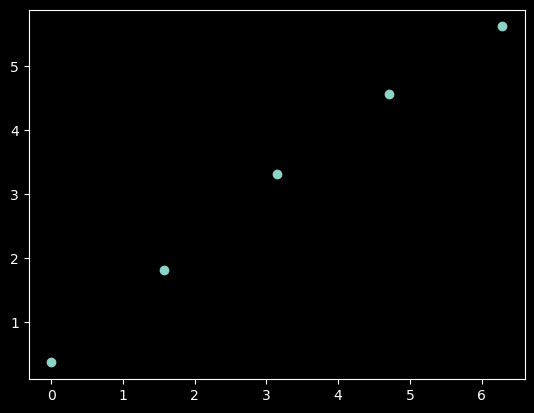

In [18]:
p1_aligned, mad = optimal_shift(p1, p0, n_s=3)

plt.scatter(p0, p1_aligned)